### Import the necessary packages

In [8]:
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

### Label the dataset

In [9]:
def get_data(url:str, words: dict = {}):
    """this function reads the data from the url and stores it in a dictionary

    Args:
        url (str): the url of the data
        words (dict, optional): the variable to store the words. Defaults to {}.

    Returns:
        dict: the dictionary containing the words
    """
    response = requests.get(url)
    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=",")
        for row in reader:
            words[row[0]] = int(row[1])
    else:
        print("Error")
    return words

In [10]:
def count_sentiment(text: str,
                lexicon_plus: dict, lexicon_minus: dict):
    """this function counts the sentiment of the text

    Args:
        text (str): the text to be analyzed
        lexicon_plus (dict): the positive lexicon
        lexicon_minus (dict): the negative lexicon

    Returns:
        int: the sentiment score
    """
    score = 0
    for word in word_tokenize(text):
        if word in lexicon_plus.keys():
            score += lexicon_plus[word]
        if word in lexicon_minus.keys():
            score += lexicon_minus[word]
    return score

In [11]:
def sentiment_label(score: int):
    """this function labels the sentiment

    Args:
        score (int): the sentiment score

    Returns:
        str: the sentiment label
    """
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [12]:
url = {
    "positives": "https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv",
    "negatives": "https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv"
}

positives_words = get_data(url["positives"])
negatives_words = get_data(url["negatives"])

In [13]:
dataset = pd.read_csv("./../data/clean_brimo_reviews.csv")
dataset.tail(5)

,content,score
7957,fasst kartu bri mendaftarkanya,5
7958,layan cepat aman,5
7959,tidak sih kalau kasih info promo tidak malem g...,1
7960,trimakasih,5
7961,apk nya keren,5


In [14]:
dataset["sentiment_score"] = dataset.content.apply(count_sentiment, args=(positives_words, negatives_words))

In [15]:
dataset["sentiment"] = dataset.sentiment_score.apply(sentiment_label)

In [16]:
dataset

,content,score,sentiment_score,sentiment
0,aplikasi bagus,5,-16,negative
1,beli token listrik udah sukses,3,0,neutral
2,bagus,5,-8,negative
3,aplikasi nya keren tf saldo min,5,-4,negative
4,bantu,5,-8,negative
...,...,...,...,...
7957,fasst kartu bri mendaftarkanya,5,0,neutral
7958,layan cepat aman,5,-10,negative
7959,tidak sih kalau kasih info promo tidak malem g...,1,-36,negative
7960,trimakasih,5,8,positive


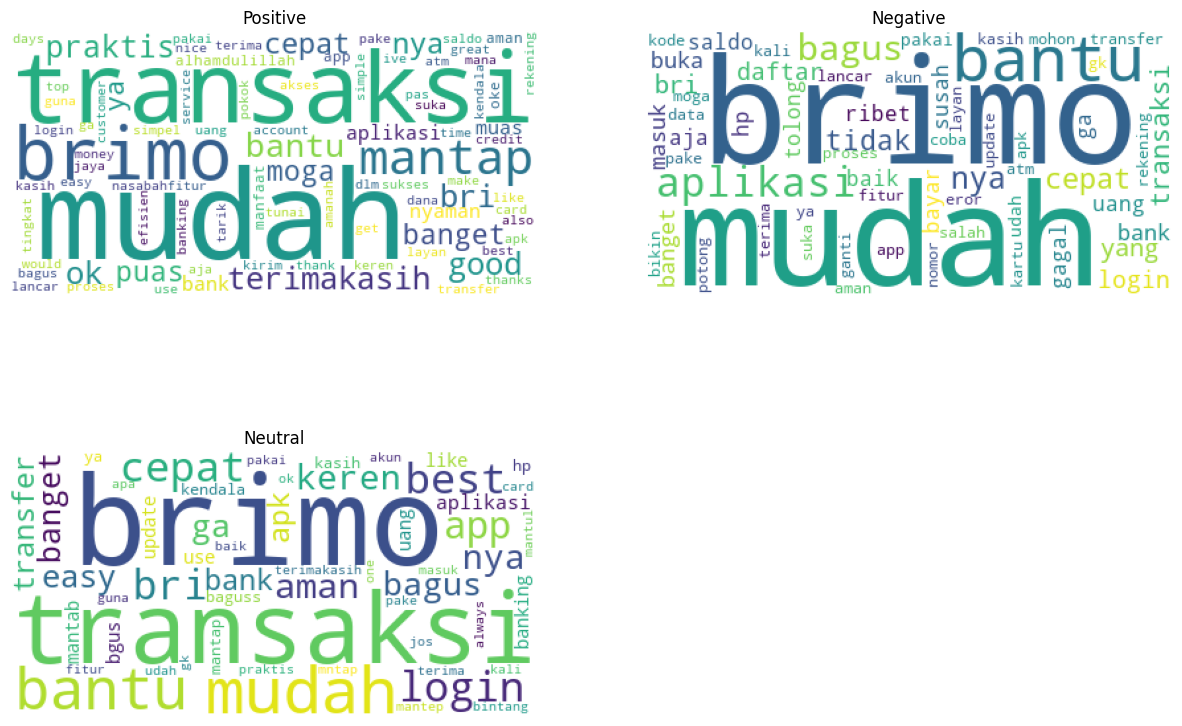

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(WordCloud(background_color="white", min_font_size=10).generate_from_frequencies(dataset.loc[dataset.sentiment == "positive", "content"].apply(word_tokenize).explode().value_counts().to_dict()))
plt.title("Positive")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(WordCloud(background_color="white", min_font_size=10).generate_from_frequencies(dataset.loc[dataset.sentiment == "negative", "content"].apply(word_tokenize).explode().value_counts().to_dict()))
plt.title("Negative")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(WordCloud(background_color="white", min_font_size=10).generate_from_frequencies(dataset.loc[dataset.sentiment == "neutral", "content"].apply(word_tokenize).explode().value_counts().to_dict()))
plt.title("Neutral")
plt.axis("off")

plt.show()

In [37]:
summary_info = pd.DataFrame(dataset.sentiment.value_counts()).reset_index()
summary_info["percentage"] = summary_info["count"] / summary_info["count"].sum() * 100
summary_info

,sentiment,count,percentage
0,negative,4410,55.388093
1,positive,2346,29.464959
2,neutral,1206,15.146948


In [ ]:
dataset.to_csv("./../data/dataset_sentiment.csv", index=False)